In [115]:
import xarray as xr
import rasterio as rio


import pandas as pd
import geopandas as gpd

from shapely import geometry, wkt


import cartopy.crs as ccrs
import cartopy.feature as cf

import sentinelsat as ss

import numpy as np

import matplotlib.pyplot as plt

import requests
from requests.auth import HTTPBasicAuth


import os


auth = HTTPBasicAuth('tonycan', os.environ['ss_pass'])

api_url='https://coda.eumetsat.int/'
# api_url=''

## Can we get Sentinel 3 OLCI Data?

In [5]:
s3_api = ss.SentinelAPI('tonycan', os.environ['ss_pass'], api_url)

Maybe for a single plankton area? 

In [6]:
plankton = pd.read_csv('../data/Phytoplankton_temperature_growth_rate_dataset_2016_01_29/traits_derived_2016_01_29.csv', engine='python')

In [7]:
plankton = plankton[
    (plankton.habitat == 'marine') & 
    (plankton.curvequal == 'good')
]

In [8]:
random_isolate = plankton.sample(1)

In [9]:
random_isolate

isolate.code                   source  isolation.latitude  \
178           256  Friday Harbour, WA, USA               48.54   

     isolation.longitude habitat                              name  \
178              -123.01  marine  Skeletonema costatum clone FHS 3   

              speciesname former.name.1 former.name.2 strain  ... minqual  \
178  Skeletonema costatum           NaN           NaN    NaN  ...    good   

    maxqual curvequal abs.curveskew rel.curveskew used.for.optimum.analysis  \
178    good      good   -309.835196     -0.014434                       1.0   

    used.for.tmax.analysis used.for.tmin.analysis  \
178                    1.0                    1.0   

    used.for.niche.width.analysis used.for.max.growth.rate.analysis  
178                           1.0                               1.0  

[1 rows x 44 columns]

In [49]:
random_isolate_wkt = wkt.dumps(
    geometry.Point([
        random_isolate['isolation.longitude'],
        random_isolate['isolation.latitude']]
    ).buffer(0.01)
)

In [79]:
q = s3_api.query(area=random_isolate_wkt, producttype='OL_2_WFR___')

Querying products: 100%|██████████| 470/470 [00:08<00:00, 52.47 products/s]


In [80]:
q_df = s3_api.to_geodataframe(q)

In [81]:
q_df.head()

title  \
5101fa1e-d757-4716-b22f-a53d68390074  S3B_OL_2_WFR____20200503T011909_20200503T01220...   
4d2f8e29-30f7-4d67-80ca-f012a240447d  S3B_OL_2_WFR____20200504T005258_20200504T00555...   
f777d8c4-217a-497b-96c7-6875c6960df0  S3A_OL_2_WFR____20200502T004354_20200502T00465...   
a34716d9-4224-4aac-85cd-e87b71b0ebcc  S3B_OL_2_WFR____20200503T011909_20200503T01220...   
ed2b09f4-5673-47be-8fdf-1f70057655ac  S3A_OL_2_WFR____20200501T011005_20200501T01130...   

                                                                                   link  \
5101fa1e-d757-4716-b22f-a53d68390074  http://coda.eumetsat.int/odata/v1/Products('51...   
4d2f8e29-30f7-4d67-80ca-f012a240447d  http://coda.eumetsat.int/odata/v1/Products('4d...   
f777d8c4-217a-497b-96c7-6875c6960df0  http://coda.eumetsat.int/odata/v1/Products('f7...   
a34716d9-4224-4aac-85cd-e87b71b0ebcc  http://coda.eumetsat.int/odata/v1/Products('a3...   
ed2b09f4-5673-47be-8fdf-1f70057655ac  http://coda.eumetsat.int/odata/v1/Products('ed...   

                                                                       link_alternative  \
5101fa1e-d757-4716-b22f-a53d68390074  http://coda.eumetsat.int/odata/v1/Products('51...   
4d2f8e29-30f7-4d67-80ca-f012a240447d  http://coda.eumetsat.int/odata/v1/Products('4d...   
f777d8c4-217a-497b-96c7-6875c6960df0  http://coda.eumetsat.int/odata/v1/Products('f7...   
a34716d9-4224-4aac-85cd-e87b71b0ebcc  http://coda.eumetsat.int/odata/v1/Products('a3...   
ed2b09f4-5673-47be-8fdf-1f70057655ac  http://coda.eumetsat.int/odata/v1/Products('ed...   

                                                                              link_icon  \
5101fa1e-d757-4716-b22f-a53d68390074  http://coda.eumetsat.int/odata/v1/Products('51...   
4d2f8e29-30f7-4d67-80ca-f012a240447d  http://coda.eumetsat.int/odata/v1/Products('4d...   
f777d8c4-217a-497b-96c7-6875c6960df0  http://coda.eumetsat.int/odata/v1/Products('f7...   
a34716d9-4224-4aac-85cd-e87b71b0ebcc  http://coda.eumetsat.int/odata/v1/Products('a3...   
ed2b09f4-5673-47be-8fdf-1f70057655ac  http://coda.eumetsat.int/odata/v1/Products('ed...   

                                                                                summary  \
5101fa1e-d757-4716-b22f-a53d68390074  Date: 2020-05-03T01:19:08.778Z, Instrument: OL...   
4d2f8e29-30f7-4d67-80ca-f012a240447d  Date: 2020-05-04T00:52:57.998Z, Instrument: OL...   
f777d8c4-217a-497b-96c7-6875c6960df0  Date: 2020-05-02T00:43:53.983Z, Instrument: OL...   
a34716d9-4224-4aac-85cd-e87b71b0ebcc  Date: 2020-05-03T01:19:08.778Z, Instrument: OL...   
ed2b09f4-5673-47be-8fdf-1f70057655ac  Date: 2020-05-01T01:10:04.815Z, Instrument: OL...   

                                               ingestiondate  \
5101fa1e-d757-4716-b22f-a53d68390074 2020-05-04 11:40:11.058   
4d2f8e29-30f7-4d67-80ca-f012a240447d 2020-05-04 03:11:03.134   
f777d8c4-217a-497b-96c7-6875c6960df0 2020-05-03 10:08:31.361   
a34716d9-4224-4aac-85cd-e87b71b0ebcc 2020-05-03 03:26:12.221   
ed2b09f4-5673-47be-8fdf-1f70057655ac 2020-05-02 10:41:19.430   

                                               beginposition  \
5101fa1e-d757-4716-b22f-a53d68390074 2020-05-03 01:19:08.778   
4d2f8e29-30f7-4d67-80ca-f012a240447d 2020-05-04 00:52:57.998   
f777d8c4-217a-497b-96c7-6875c6960df0 2020-05-02 00:43:53.983   
a34716d9-4224-4aac-85cd-e87b71b0ebcc 2020-05-03 01:19:08.778   
ed2b09f4-5673-47be-8fdf-1f70057655ac 2020-05-01 01:10:04.815   

                                                 endposition  orbitnumber  \
5101fa1e-d757-4716-b22f-a53d68390074 2020-05-03 01:22:08.778        10527   
4d2f8e29-30f7-4d67-80ca-f012a240447d 2020-05-04 00:55:57.998        10541   
f777d8c4-217a-497b-96c7-6875c6960df0 2020-05-02 00:46:53.983        21906   
a34716d9-4224-4aac-85cd-e87b71b0ebcc 2020-05-03 01:22:08.778        10527   
ed2b09f4-5673-47be-8fdf-1f70057655ac 2020-05-01 01:13:04.815        21892   

                                      relativeorbitnumber  ... productlevel  \
5101fa1e-d757-4716-b22f-a53d6839007

In [90]:
r = requests.get(q_df.iloc[-1].link, auth=auth)

In [99]:
with open(f'{q_df.iloc[-1].title}.zip', 'wb') as f:
    f.write(r.content)

In [100]:
f.close

<function BufferedWriter.close>

In [104]:
d = xr.open_mfdataset([
    "S3B_OL_2_WFR____20190503T010754_20190503T011054_20190504T095009_0179_025_031_2340_MAR_O_NT_002.SEN3/chl_oc4me.nc",
    "S3B_OL_2_WFR____20190503T010754_20190503T011054_20190504T095009_0179_025_031_2340_MAR_O_NT_002.SEN3/geo_coordinates.nc"
])

/home/ec2-user/miniconda3/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/home/ec2-user/miniconda3/envs/notebook/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied req

In [109]:
d = d.set_coords(['longitude', 'latitude'])

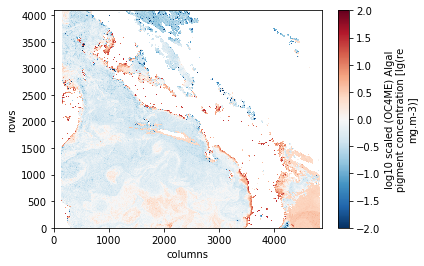

In [111]:
d.CHL_OC4ME.plot()

In [11]:
import satpy

In [12]:
files = satpy.find_files_and_readers(sensor='olci',
                               base_dir=".",
                               reader='olci_l2')


In [13]:
files

{'olci_l2': ['./S3B_OL_2_WFR____20190503T010754_20190503T011054_20190504T095009_0179_025_031_2340_MAR_O_NT_002.SEN3/Oa18_reflectance.nc',
  './S3B_OL_2_WFR____20190503T010754_20190503T011054_20190504T095009_0179_025_031_2340_MAR_O_NT_002.SEN3/Oa01_reflectance.nc',
  './S3B_OL_2_WFR____20190503T010754_20190503T011054_20190504T095009_0179_025_031_2340_MAR_O_NT_002.SEN3/Oa08_reflectance.nc',
  './S3B_OL_2_WFR____20190503T010754_20190503T011054_20190504T095009_0179_025_031_2340_MAR_O_NT_002.SEN3/Oa05_reflectance.nc',
  './S3B_OL_2_WFR____20190503T010754_20190503T011054_20190504T095009_0179_025_031_2340_MAR_O_NT_002.SEN3/Oa04_reflectance.nc',
  './S3B_OL_2_WFR____20190503T010754_20190503T011054_20190504T095009_0179_025_031_2340_MAR_O_NT_002.SEN3/Oa03_reflectance.nc',
  './S3B_OL_2_WFR____20190503T010754_20190503T011054_20190504T095009_0179_025_031_2340_MAR_O_NT_002.SEN3/Oa17_reflectance.nc',
  './S3B_OL_2_WFR____20190503T010754_20190503T011054_20190504T095009_0179_025_031_2340_MAR_O_NT_002.

In [79]:
from pyresample import AreaDefinition

In [82]:
sc = satpy.Scene(files)

In [83]:
sc.load(['chl_oc4me'])


In [89]:
lats = sc['chl_oc4me'].attrs['area'].lats.compute()
lons = sc['chl_oc4me'].attrs['area'].lons.compute()


In [93]:
lons.min()

<xarray.DataArray 'longitude' ()>
array(127.206492)

In [73]:
sc.available_composite_names()

['night_background', 'night_background_hires']

In [120]:
a = sc['chl_oc4me'].attrs['area'].compute_optimal_bb_area(ccrs.LambertConformal().proj4_params)
a.to_cartopy_crs()

_PROJ4Projection(+ellps=WGS84 +lat_0=39.0 +lat_1=33.0 +lat_2=45.0 +lon_0=-96.0 +proj=lcc +x_0=0.0 +y_0=0.0 +no_defs)

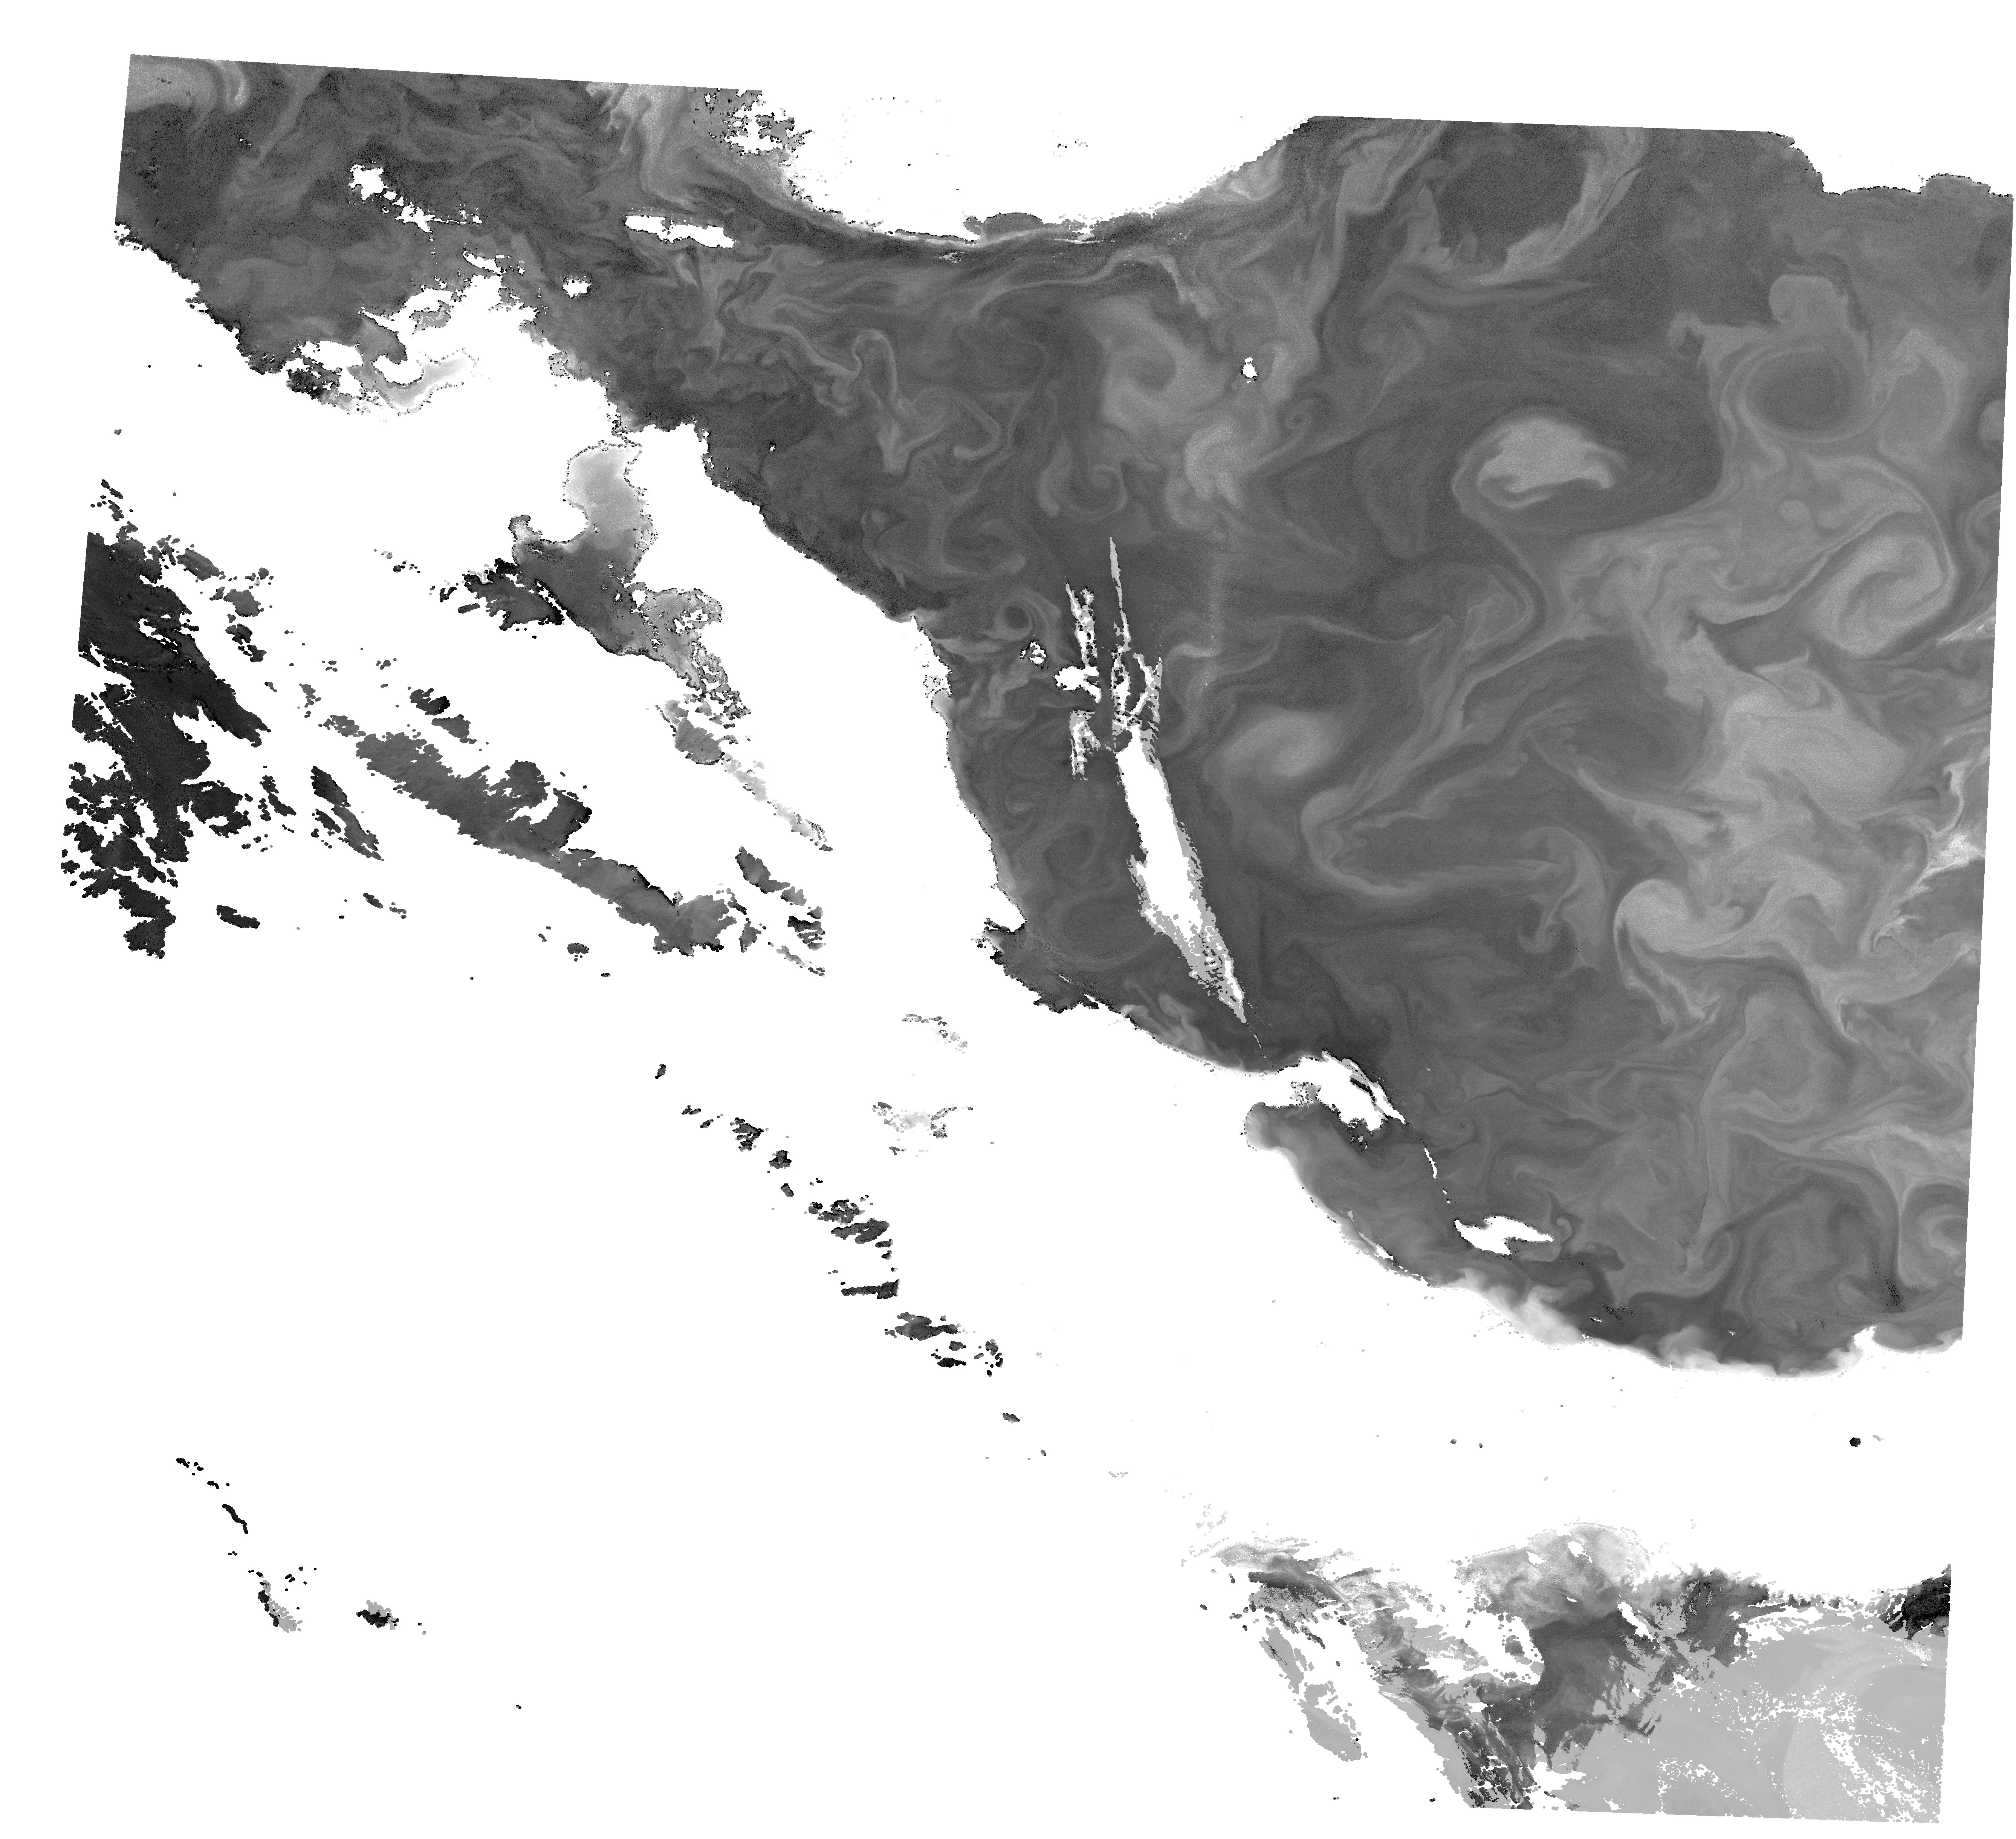

In [116]:
# area_id = "Europe"
# description = "Isolate in Lambert Azimuthal Equal Area projection"
# proj_id = "Europe"
# proj_dict = {"proj": "laea", "lat_0": 29, "lon_0": 127}
# width = 750 
# height = 750
# llx =  -18E5
# lly =  -18E5
# urx =  18E5
# ury =  18E5
# area_extent = (llx, lly, urx, ury)
# area_def = AreaDefinition(area_id, proj_id, description, proj_dict, width, height, area_extent)
local_scn = sc.resample(sc['chl_oc4me'].attrs['area'].compute_optimal_bb_area(ccrs.LambertConformal().proj4_params))
# local_scn.show("chl_oc4me")

In [117]:
image = np.asarray(local_scn["chl_oc4me"])


In [127]:
local_scn["chl_oc4me"]

<xarray.DataArray 'my_index-7a5c921c997ba25237ea47fc35c3c563' (y: 4881, x: 5351)>
dask.array<my_index, shape=(4881, 5351), dtype=float32, chunksize=(4096, 4096), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 7.262e+06 7.262e+06 7.262e+06 ... 5.891e+06 5.891e+06
  * x        (x) float64 -8.727e+06 -8.727e+06 ... -7.473e+06 -7.473e+06
Attributes:
    long_name:            log10 scaled (OC4ME) Algal pigment concentration
    modifiers:            ()
    resolution:           300
    calibration:          reflectance
    platform_name:        Sentinel-3B
    units:                lg(re mg.m-3)
    sensor:               olci
    name:                 chl_oc4me
    start_time:           2019-05-03 01:07:54.131002
    end_time:             2019-05-03 01:10:54.054677
    area:                 Area ID: lcc_otf\nDescription: On-the-fly lcc area\...
    polarization:         None
    level:                None
    ancillary_variables:  []

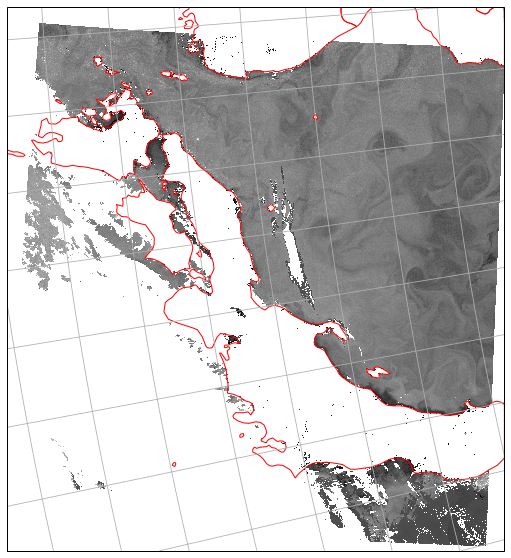

In [123]:
fig = plt.subplots(figsize=(10,10))
crs = a.to_local_scn["chl_oc4me"_crs()
ax = plt.axes(projection=crs)

ax.gridlines()
states_provinces = cf.NaturalEarthFeature(
  category="cultural",
  name="admin_0_countries",
  scale="50m",
  facecolor="none")
ax.add_feature(states_provinces, edgecolor="red", facecolor='none')
ax.imshow(image, transform=crs, extent=crs.bounds, origin="upper", cmap='binary')

In [124]:
local_scn.save_dataset('chl_oc4me', writer='geotiff', compute=True, filename='geotiff_test.tif')